## Steps

Create a problem statement

Identify the data u want to analyse

Explore the data and Clean data

Analyze the data to get insights

Present the data in terms of reports or dashboards using visualizations

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
df=pd.read_csv("hotel_bookings 2.csv")

## Exploratory Data Analysis

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017


In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

changing data type:

In [7]:
df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"],errors="coerce",infer_datetime_format=True)

Checking various categories and unique data

In [8]:
#object data types- categorical-->check categories-->how many unique values?
df.describe(include='object')  #unique= no. of categories

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [9]:
for columns in df.describe(include='object').columns:
    print(columns)
    print(df[columns].unique())
    print("-"*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

Null Values

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
df.drop(["company","agent"],axis=1, inplace=True)
df.dropna(inplace=True)

In [12]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776
mean,0.380345,102.144219,2016.142659,27.125299,12.877437,0.932316,2.506285,1.873076,0.102211,0.008273,0.030635,0.096374,0.135005,0.209531,1.627822,101.747121,0.061784,0.574846,2016-07-30 02:43:02.247306240
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-01-01 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,5.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-03 00:00:00
50%,0.000000,69.000000,2016.000000,27.000000,9.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-05 00:00:00
75%,1.000000,159.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.100000,0.000000,1.000000,2017-03-04 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,1.000000,25.000000,68.000000,20.000000,259.000000,510.000000,3.000000,5.000000,2017-12-09 00:00:00
std,0.485477,102.191260,0.723538,13.663305,10.101704,0.989412,1.911009,0.650838,0.398456,0.091288,0.172330,0.740802,1.510430,0.620846,13.717929,47.452396,0.242534,0.790726,NaN


Handling Outliers

is_canceled


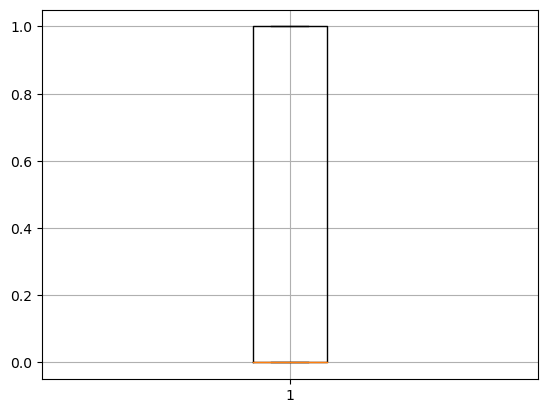

lead_time


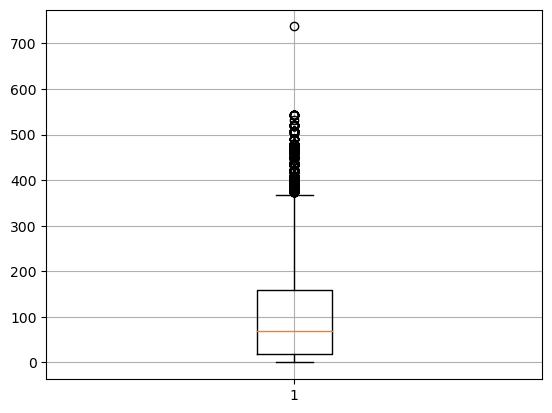

arrival_date_year


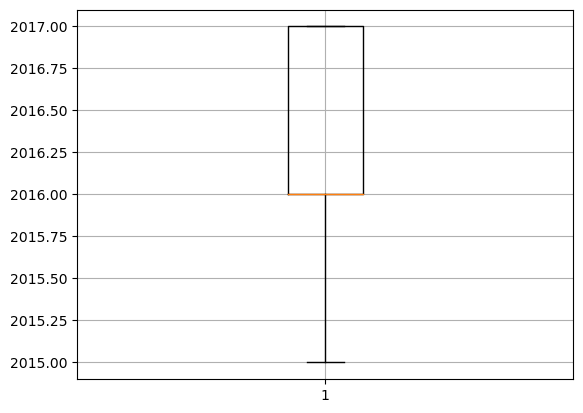

arrival_date_week_number


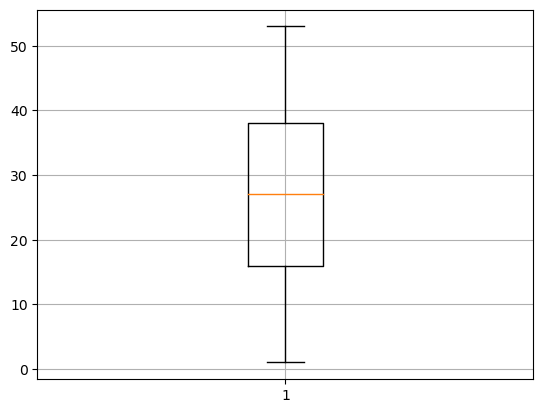

arrival_date_day_of_month


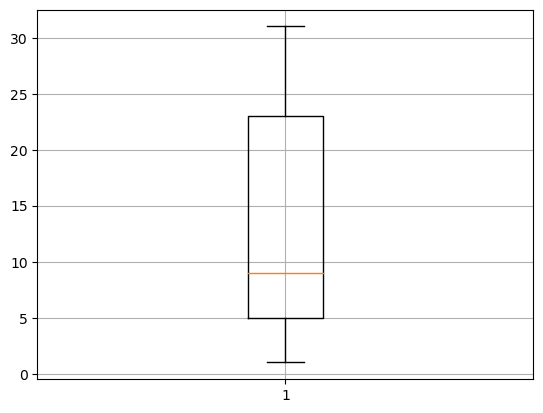

stays_in_weekend_nights


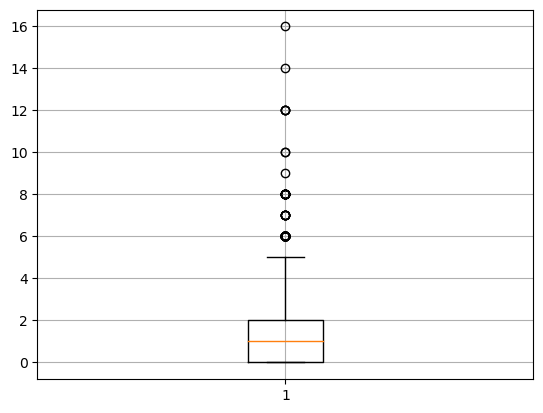

stays_in_week_nights


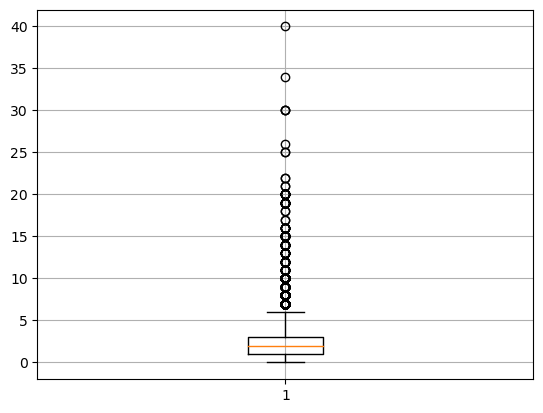

adults


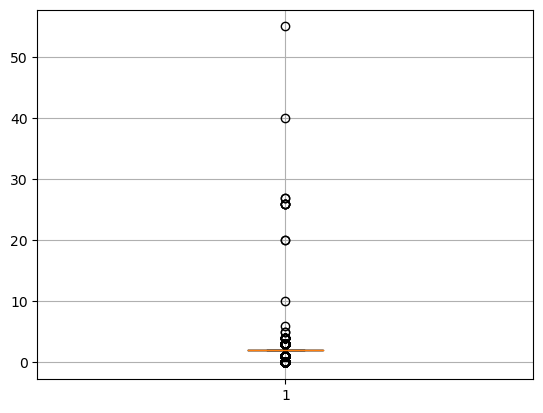

children


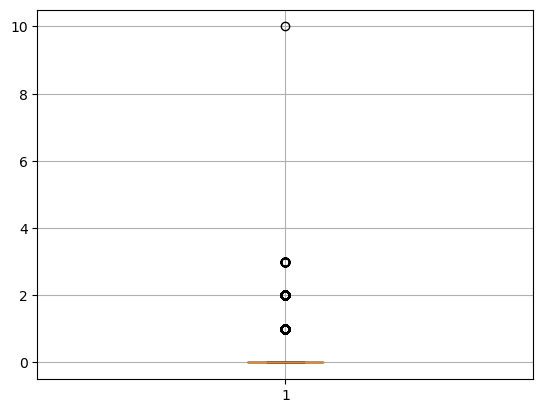

babies


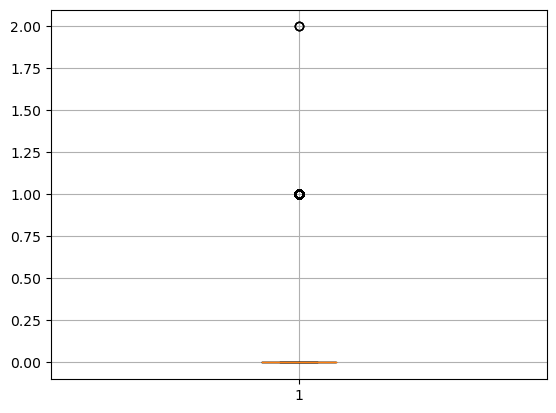

is_repeated_guest


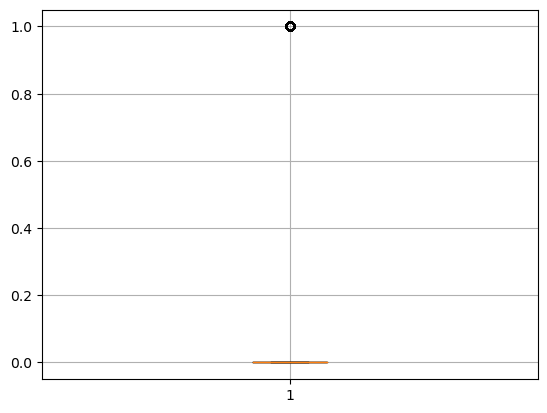

previous_cancellations


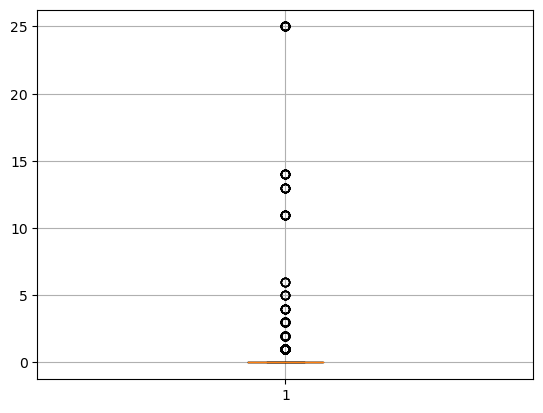

previous_bookings_not_canceled


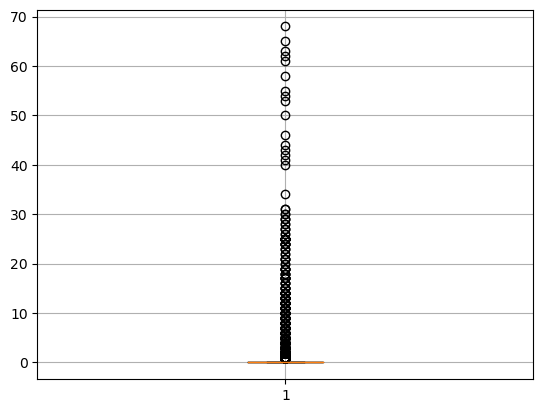

booking_changes


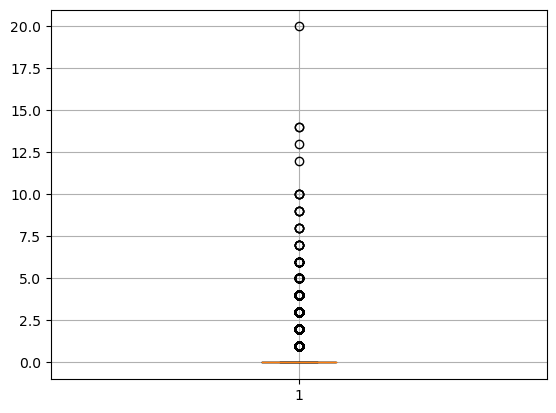

days_in_waiting_list


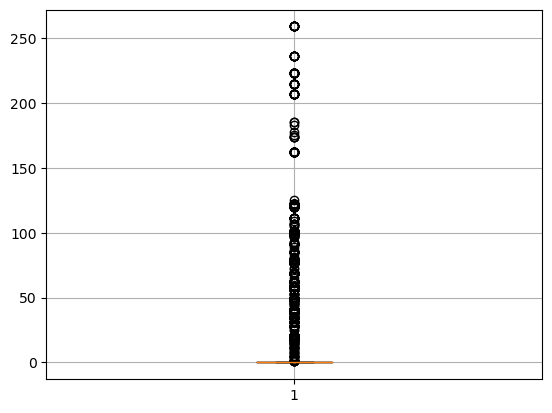

adr


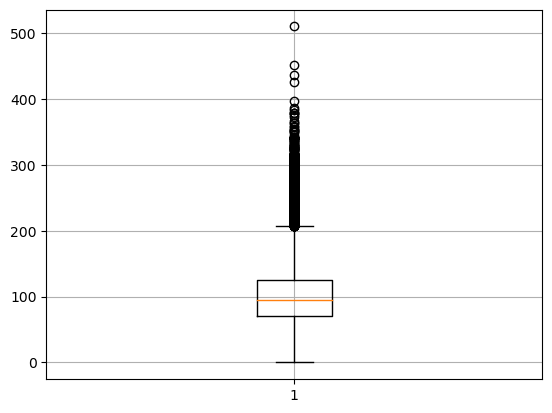

required_car_parking_spaces


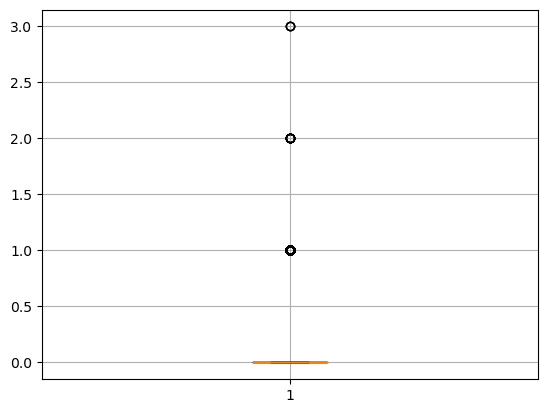

total_of_special_requests


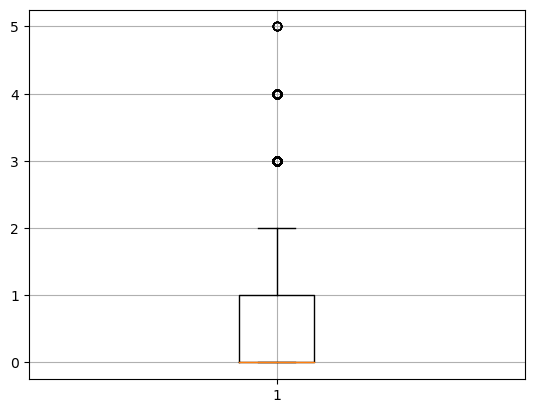

In [13]:
column_name=["is_canceled","lead_time","arrival_date_year","arrival_date_week_number","arrival_date_day_of_month","stays_in_weekend_nights","stays_in_week_nights","adults","children","babies","is_repeated_guest","previous_cancellations","previous_bookings_not_canceled","booking_changes","days_in_waiting_list","adr","required_car_parking_spaces","total_of_special_requests"]
for i in column_name:
    print(i)
    plt.boxplot(df[i])
    plt.grid()
    plt.show()

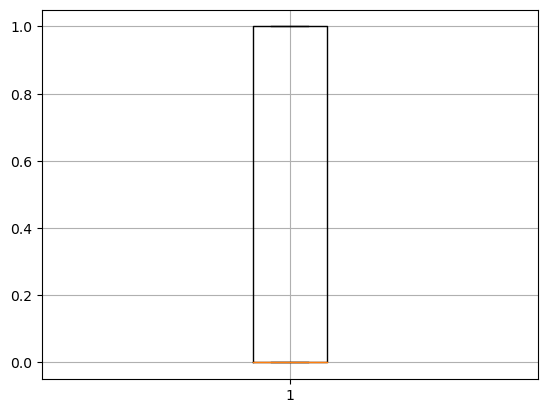

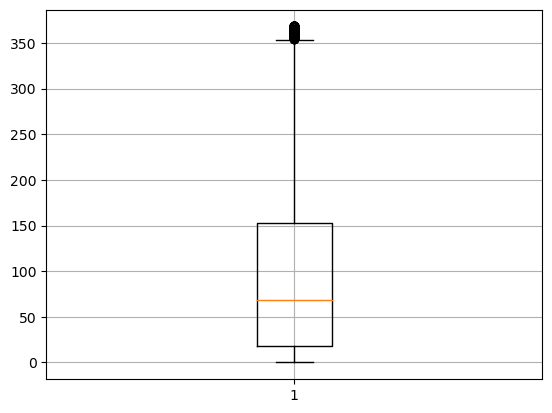

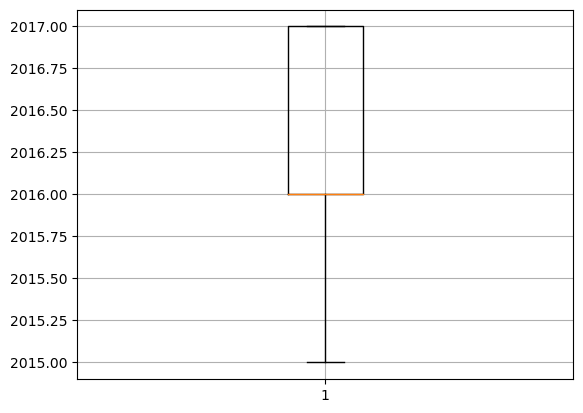

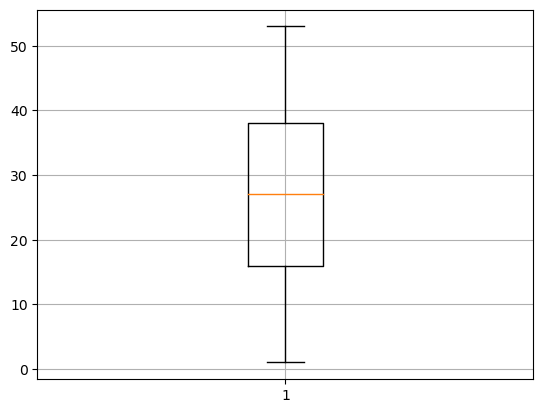

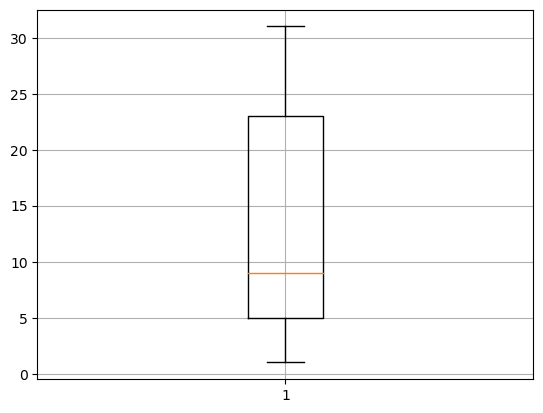

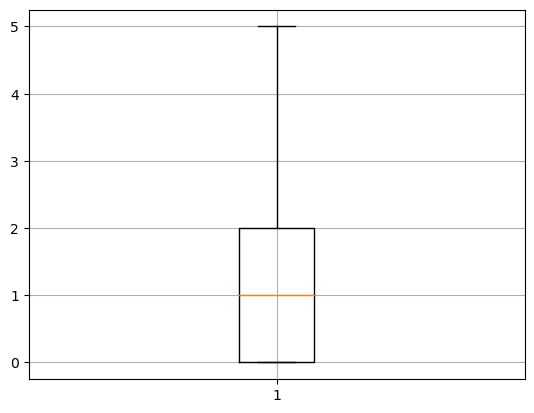

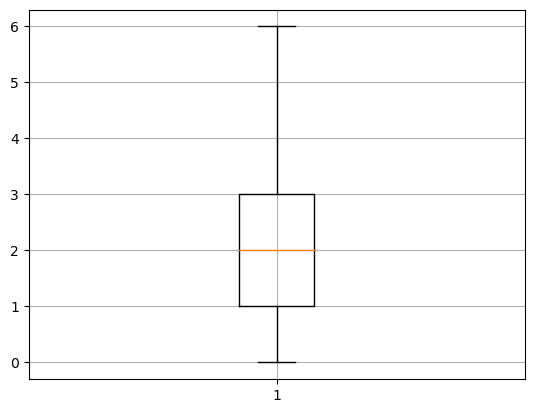

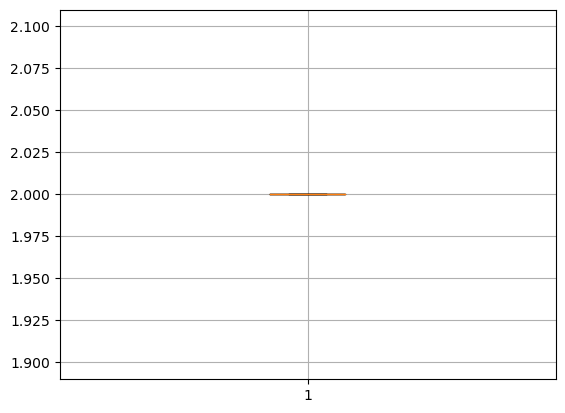

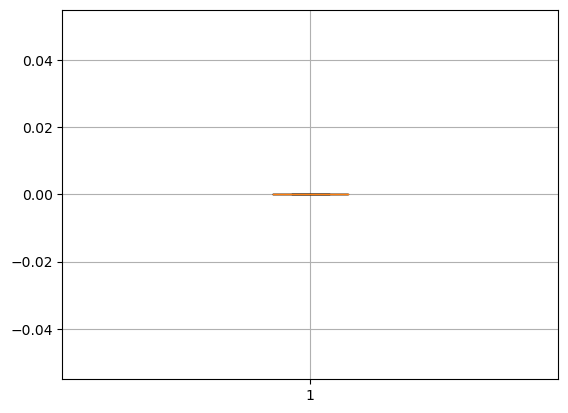

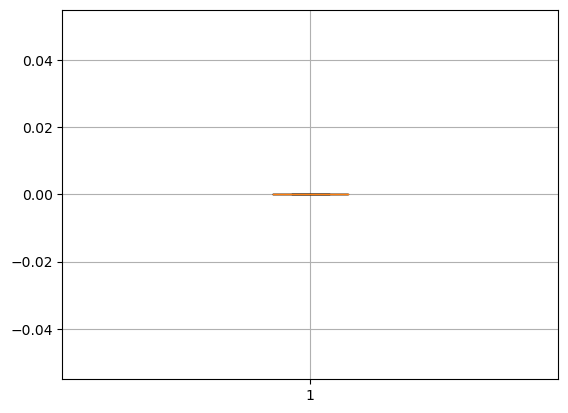

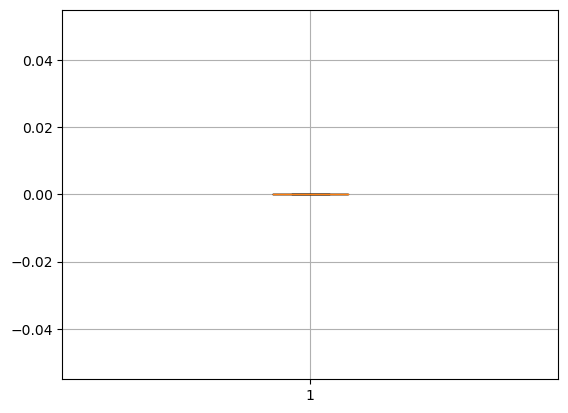

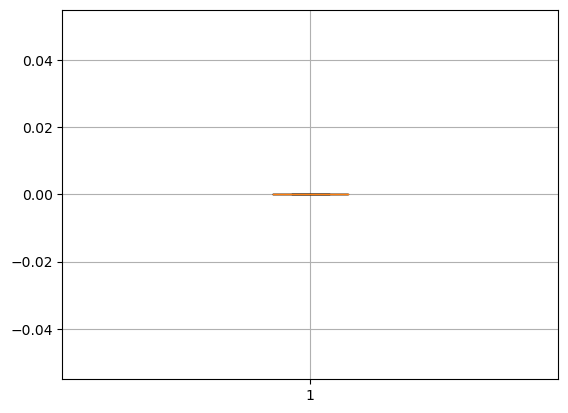

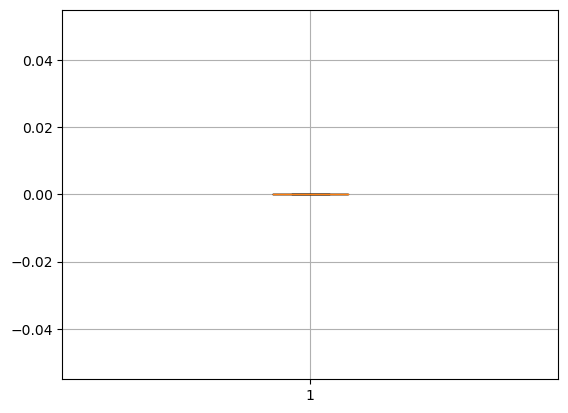

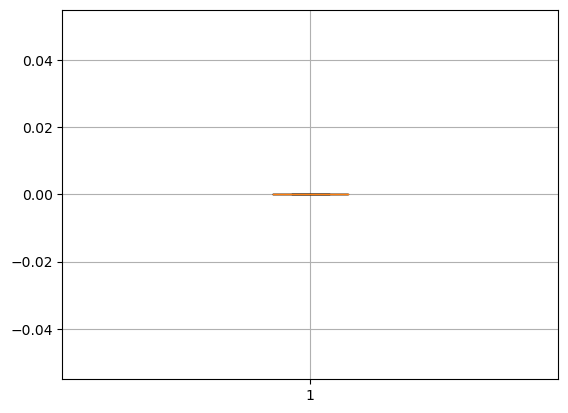

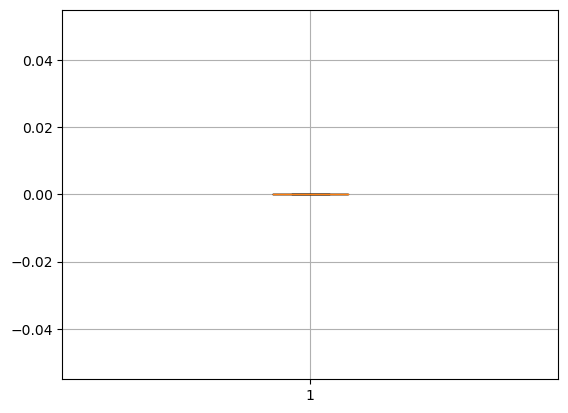

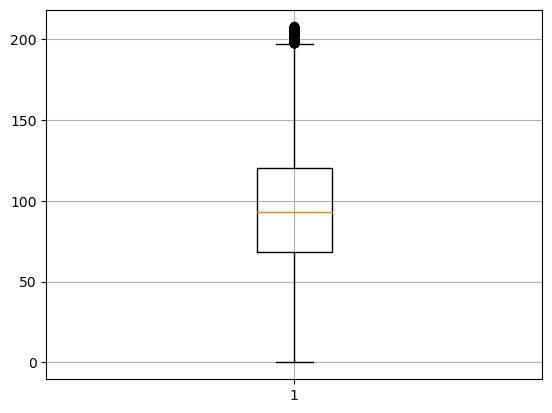

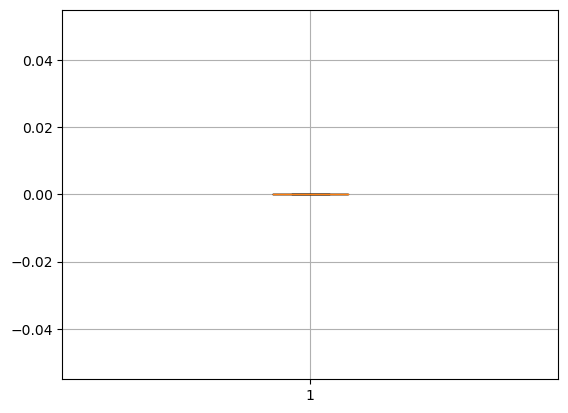

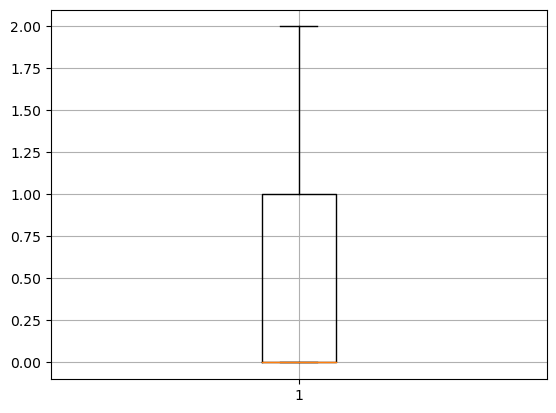

In [14]:
for i in column_name:    
    q75,q25=np.percentile(df[i],[75,25])

    IQR=q75-q25

    q0=q25-(IQR*1.5)
    q100=q75+(IQR*1.5)

    fdf=df[i][(df[i]<=q100) & (df[i]>=q0)]  #df created without outliers

    plt.boxplot(fdf)
    plt.grid()
    plt.show()

## Data analysis and visualisations

is_canceled
0    0.619655
1    0.380345
Name: proportion, dtype: float64


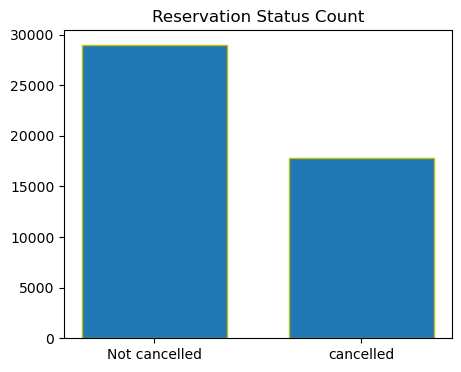

In [18]:
cancelled_perc=df["is_canceled"].value_counts(normalize=True)
print(cancelled_perc)

plt.figure(figsize=(5,4))
plt.title("Reservation Status Count")
plt.bar(["Not cancelled","cancelled"],df["is_canceled"].value_counts(),edgecolor="y",width=0.7)
plt.show()

#### The bar graph shows the % of reservations that are cancelled and those are not. There are 38% clients that cancel their bookings which is a significant number and has impact on hotel's earnings

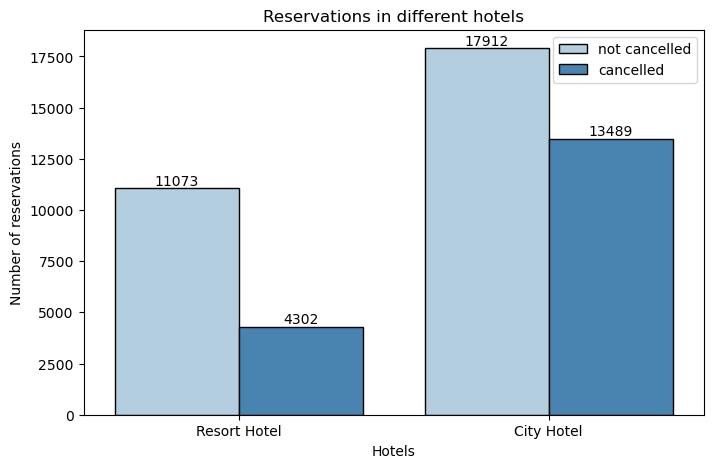

In [28]:
plt.figure(figsize=(8,5))
axl=sns.countplot(x="hotel",hue="is_canceled",data=df,palette="Blues",edgecolor="k")
legend_labels,_=axl.get_legend_handles_labels()
axl.legend(bbox_to_anchor=(1,1))
plt.title("Reservations in different hotels")
plt.xlabel("Hotels")
plt.ylabel("Number of reservations")
plt.legend(["not cancelled","cancelled"])

for bars in axl.containers:
    axl.bar_label(bars)
plt.show()

#### In comparison to resort hotels, city hotels have more bookings and it can be possible that resort hotels have high prices.

In [29]:
resort_hotel=df[df["hotel"]=="Resort Hotel"]
resort_hotel["is_canceled"].value_counts(normalize=True)

is_canceled
0    0.720195
1    0.279805
Name: proportion, dtype: float64

In [30]:
city_hotel=df[df["hotel"]=="City Hotel"]
city_hotel["is_canceled"].value_counts(normalize=True)

is_canceled
0    0.570428
1    0.429572
Name: proportion, dtype: float64

In [31]:
resort_hotel=resort_hotel.groupby("reservation_status_date")[["adr"]].mean()
city_hotel=city_hotel.groupby("reservation_status_date")[["adr"]].mean()

In [35]:
print(resort_hotel.head(1))
print(city_hotel.head(1))

                               adr
reservation_status_date           
2015-01-01               61.966667
                               adr
reservation_status_date           
2015-01-01               62.063158


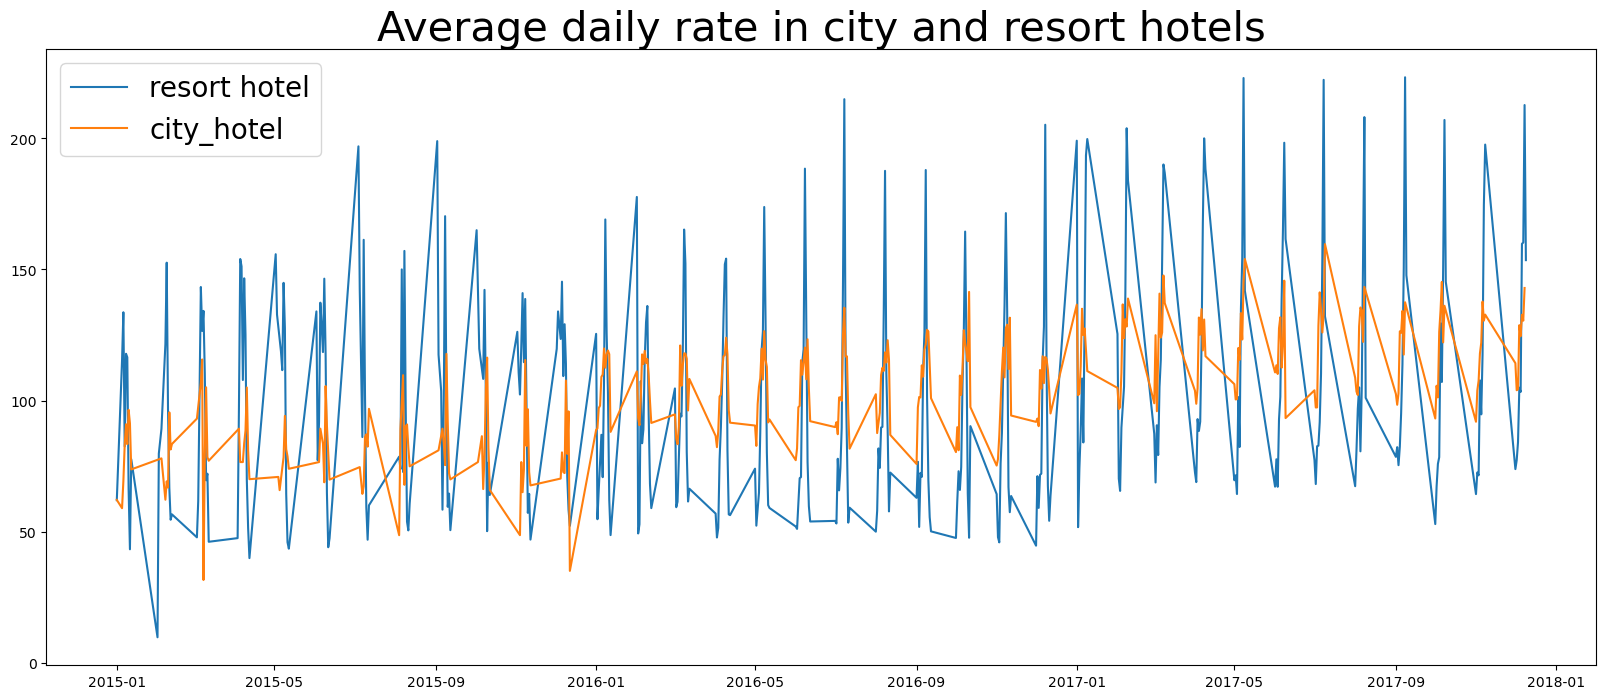

In [32]:
plt.figure(figsize=(20,8))
plt.title("Average daily rate in city and resort hotels",size=30)
plt.plot(resort_hotel.index,resort_hotel["adr"],label="resort hotel")
plt.plot(city_hotel.index,city_hotel["adr"],label="city_hotel")
plt.legend(fontsize=20)
plt.show()

#### The line graph shows that on certain days , the adr for a city hotel is less tham resort and on other days, it is even less. thus on weekends and holidays, price is higher for resort hotels.

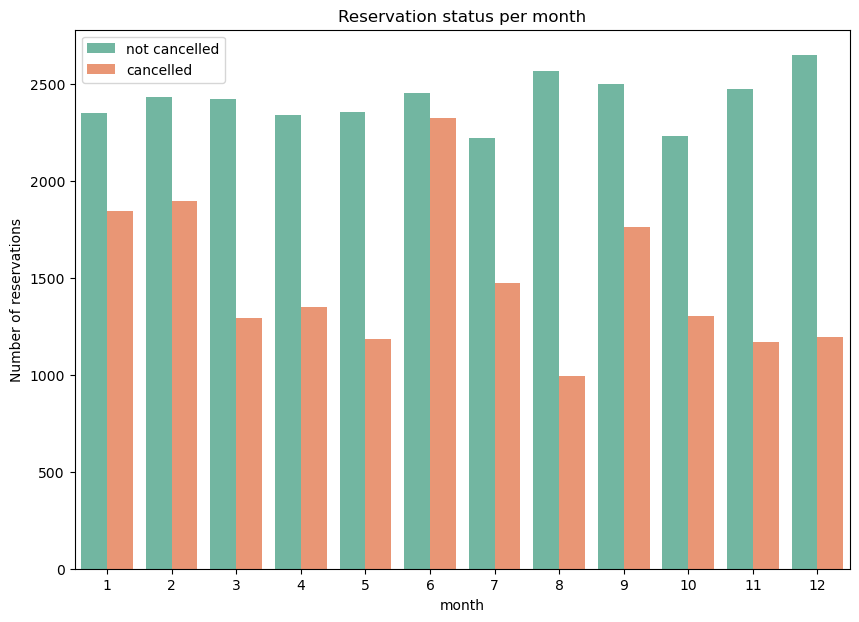

In [41]:
df["month"]=df["reservation_status_date"].dt.month
plt.figure(figsize=(10,7))
axl=sns.countplot(x="month",hue="is_canceled",data=df,palette="Set2")
legend_labels,_=axl.get_legend_handles_labels()
axl.legend(bbox_to_anchor=(0,0))
plt.title("Reservation status per month")
plt.xlabel("month")
plt.ylabel("Number of reservations")
plt.legend(["not cancelled","cancelled"])
plt.show()

#### We have developed the grouped bar graph to analyse the months with highest and lowest reservation levels according to the status.The number of reservations (confirmed) are largest in August and reservations cancelled are the least. Largest cancellations in June.

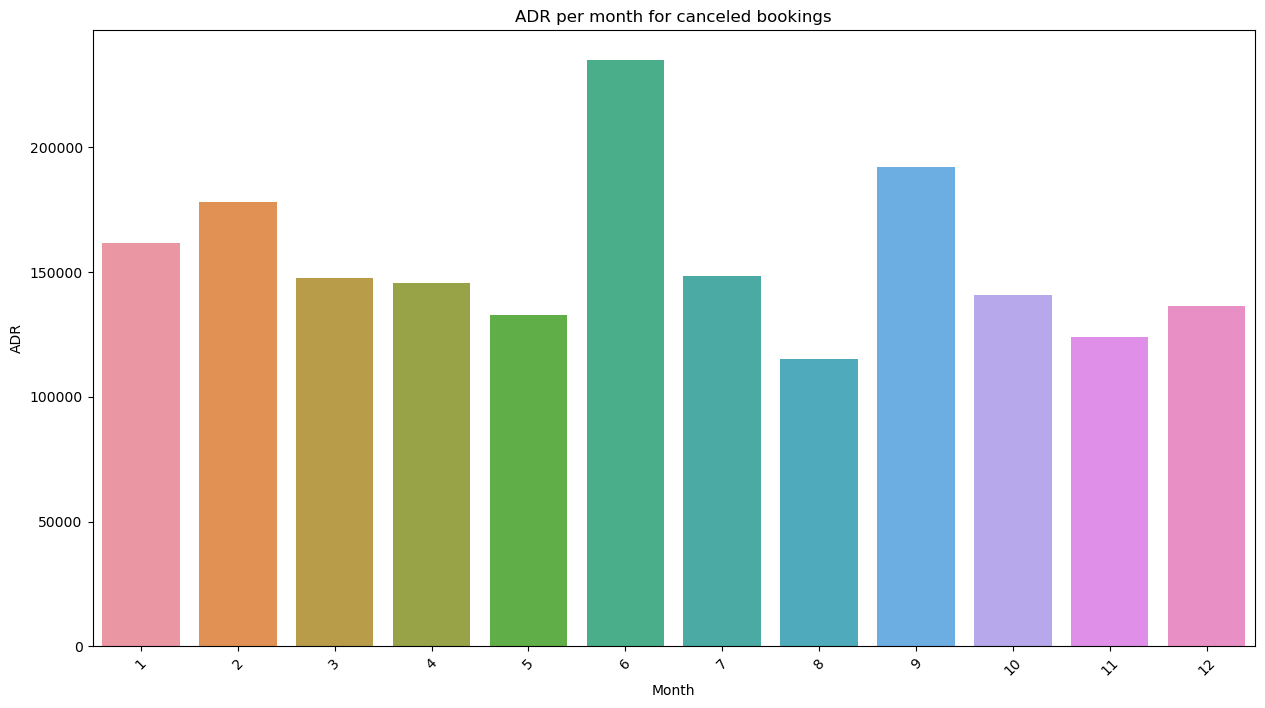

In [44]:
canceled_bookings = df[df["is_canceled"] == 1]

# Group by month and sum adr
adr_per_month = canceled_bookings.groupby("month")["adr"].sum().reset_index()

# Plotting
plt.figure(figsize=(15, 8))
plt.title("ADR per month for canceled bookings")
sns.barplot(x="month", y="adr", data=adr_per_month)
plt.xlabel("Month")
plt.ylabel("ADR")
plt.xticks(rotation=45)
plt.show()

#### This graph shows that cancellations are most common when prices are greatest and least common when prices are lowest.Therefore cost of accomodation is responsiblw for cancellation.
#### June-highest cancellations--> adr is very high
#### August- lowest cancellations-->adr is very low

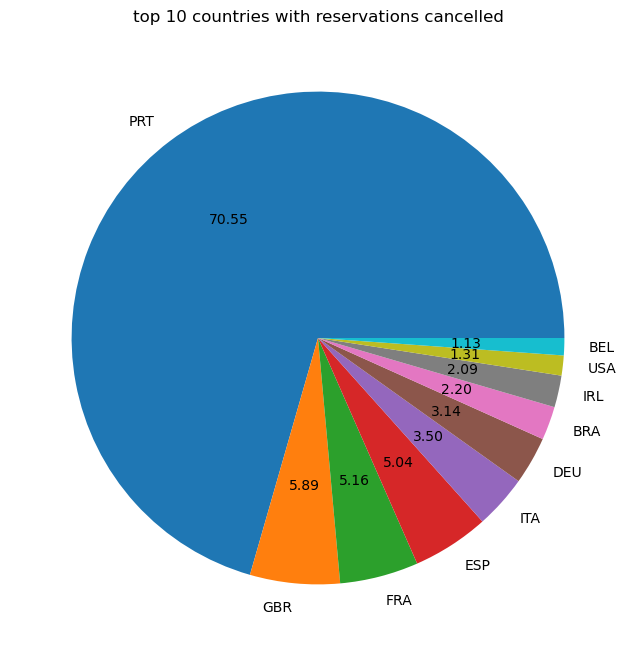

In [46]:
cancelled_data=df[df["is_canceled"]==1]
top_10_country=cancelled_data["country"].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title("top 10 countries with reservations cancelled")
plt.pie(top_10_country,autopct="%.2f",labels=top_10_country.index)
plt.show()

#### The top country is Portugal with highest number of cancellations

In [47]:
df["market_segment"].value_counts(normalize=True)

market_segment
Online TA        0.478643
Offline TA/TO    0.200872
Groups           0.165427
Direct           0.105097
Corporate        0.041859
Complementary    0.006221
Aviation         0.001881
Name: proportion, dtype: float64

In [49]:
cancelled_data["market_segment"].value_counts(normalize=True)

market_segment
Online TA        0.462706
Groups           0.279973
Offline TA/TO    0.185824
Direct           0.041144
Corporate        0.026699
Complementary    0.001967
Aviation         0.001686
Name: proportion, dtype: float64

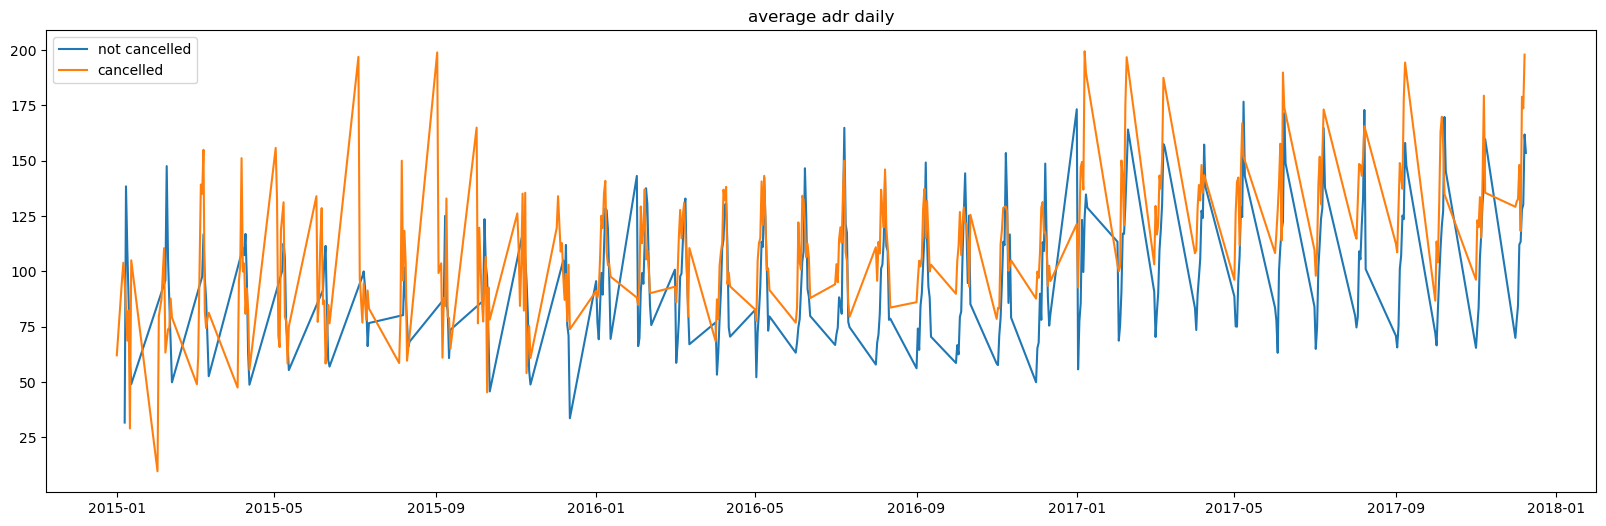

In [53]:
cancelled_data=df[df["is_canceled"]==1]
cancelled_df_adr=cancelled_data.groupby("reservation_status_date")[["adr"]].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values("reservation_status_date",inplace=True)

not_cancelled_df=df[df["is_canceled"]==0]
not_cancelled_df_adr=not_cancelled_df.groupby("reservation_status_date")[["adr"]].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values("reservation_status_date",inplace=True)

plt.figure(figsize=(20,6))
plt.title("average adr daily")
plt.plot(not_cancelled_df_adr["reservation_status_date"],not_cancelled_df_adr["adr"],label="not cancelled")
plt.plot(cancelled_df_adr["reservation_status_date"],cancelled_df_adr["adr"],label="cancelled")
plt.legend()


#### The graph shows that cancellations are max when ADR is higher than when it is not cancelled. Thus higher prices lead to high cancellations

In [52]:
print(cancelled_df_adr.head(1))
print(not_cancelled_df_adr.head(1))

  reservation_status_date        adr
0              2015-01-01  62.062779
  reservation_status_date    adr
0              2015-01-07  31.65


In [54]:
cancelled_df_adr=cancelled_df_adr[(cancelled_df_adr["reservation_status_date"]>"2016")& (cancelled_df_adr["reservation_status_date"]<"2017-09")]
not_cancelled_df_adr=not_cancelled_df_adr[(not_cancelled_df_adr["reservation_status_date"]>"2016")&(not_cancelled_df_adr["reservation_status_date"]<"2017-09")]

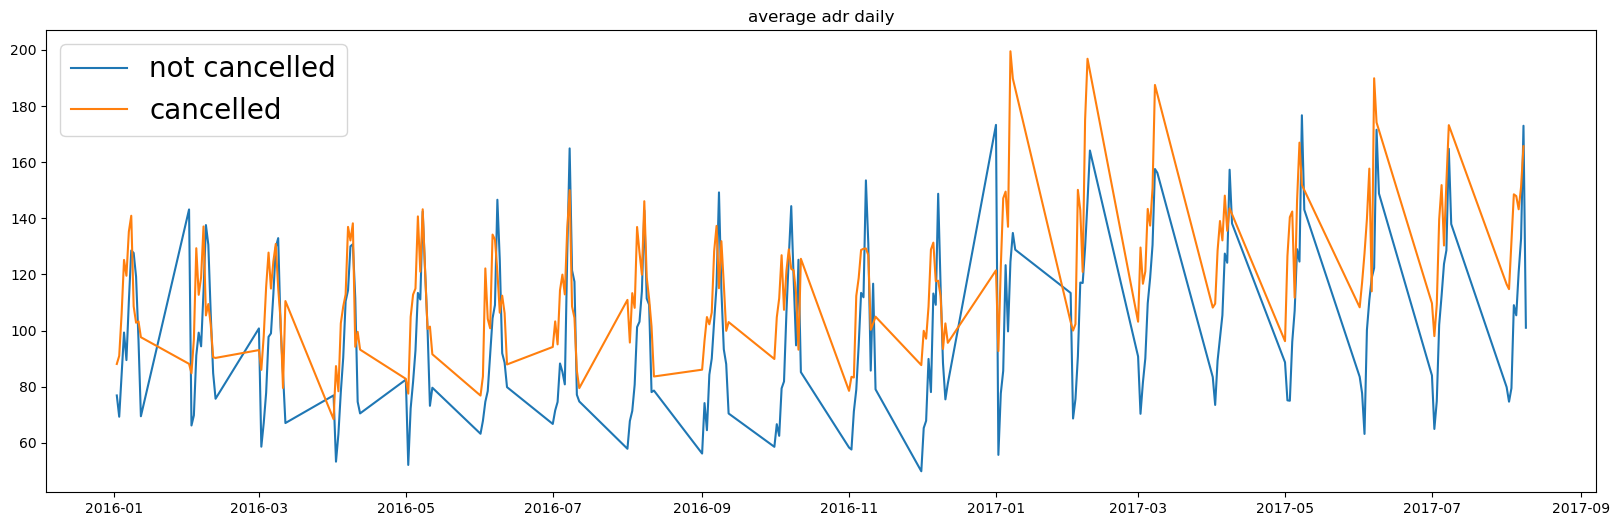

In [55]:
plt.figure(figsize=(20,6))
plt.title("average adr daily")
plt.plot(not_cancelled_df_adr["reservation_status_date"],not_cancelled_df_adr["adr"],label="not cancelled")
plt.plot(cancelled_df_adr["reservation_status_date"],cancelled_df_adr["adr"],label="cancelled")
plt.legend(fontsize=20)